In [1]:
import numpy

In [2]:
from data_analysis_helper import nm_from_ev, linear_interp, wave_filter_interp

In [3]:
from cext_wavelength_scanning import create_diel_list, Cext_wave_scan, Cext_analytical

In [4]:
#import data
ev_s , n_s , k_s = numpy.loadtxt('gold_silver_water_raw-data/silver_JC72.txt', unpack=True)
lambda_s = nm_from_ev(ev_s)

In [5]:
numpy.savetxt('gold_silver_water_raw-data/silver_JC72_nm.txt', list(zip(lambda_s, n_s, k_s)), fmt='%.8f %.3e %.3e', header='lambda [nm], refrac_index_real, refrac_index_imag ')

In [6]:
lambda_w , n_w , k_w = numpy.loadtxt('gold_silver_water_raw-data/water_HQ72.txt', unpack=True)

In [7]:
#linear interpolation
water_real_linear , water_imag_linear = linear_interp(lambda_w, n_w, k_w)

In [12]:
lambda_ws, idx_min, idx_max = wave_filter_interp(lambda_s, lambda_w)

In [13]:
n_s = n_s[idx_min:idx_max]
k_s = k_s[idx_min:idx_max]

In [14]:
n_w = water_real_linear(lambda_ws)
k_w = water_imag_linear(lambda_ws)

In [15]:
numpy.savetxt('data/lambda_refrac_water_silv.txt', list(zip(lambda_ws, n_w, k_w, n_s, k_s)), fmt='%.8f %.8e %.8e %.8e %.8e', header='lambda, refrac_index_real, refrac_index_imag ')

In [16]:
diel_wat, diel_sil, diel_list = create_diel_list(n_w, k_w, n_s, k_s)

In [17]:
import pygbe
from pygbe.util.read_data import read_fields
from pygbe.main import main

In [18]:
field_test= read_fields('sphere_complex.config')


In [19]:
w, C = Cext_wave_scan(lambda_ws[0:2], diel_list[0:2], field_test, '../pygbe_dev/pygbe/examples/lspr')

Run started on:
	Date: 2017/2/16
	Time: 12:28:37
	PyGBe version: 0.2.1+249.gb99c0c3
Config file: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr/sphere_complex.config
Parameter file: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr/sphere_complex.param
Geometry folder: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr/geometry
Running in: /home/ncclementi/Documents/git/pygbe_dev/pygbe/examples/lspr

Reading surface 0 from file geometry/sphere2K_R10
Time load mesh: 0.14943790435791016
Removed areas=0: 0

Total elements : 2048
Total equations: 4096
----------------------------

1 surfaces:

Surface 0:
	2048 elements
	Surface type       : dielectric_interface
	Cells              : 9
	Twigs              : 8
	Levels             : 2
	C0 size            : 9.978611958305848
	C0 box center      : 0.0, 0.0, 0.0
	Twig cell size     : 4.989305979152924
	Rbox/theta         : 9.978611958305848
	Analytic distance  : 2.197623822113438
	Elem. per sq Ang   : 1.6349357

In [20]:
w

array([ 203.25278261,  207.33143377])

In [21]:
C

[437.8065956354535, 427.03471610006613]

In [22]:
c_an = Cext_analytical(10, w, diel_wat[0:2], diel_sil[0:2])

In [23]:
c_an

array([ 440.79533751,  430.04250058])

In [24]:
error = abs(C-c_an)/c_an 

In [25]:
error

array([ 0.00678034,  0.00699416])

In [26]:
from matplotlib import pyplot

In [27]:
%matplotlib inline

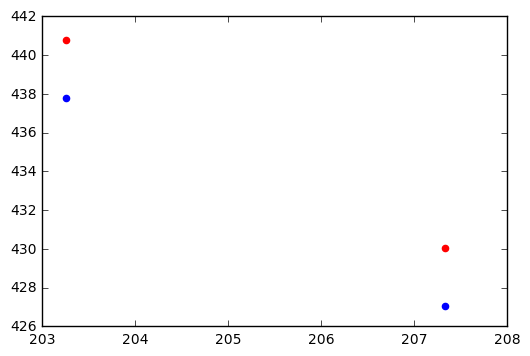

In [28]:
pyplot.scatter(w,C, color='b')
pyplot.scatter(w,c_an, color='r')